![](img/330-banner.png)

# Lecture 21: Communication

UBC 2022 Summer

Instructor: Mehrdad Oveisi

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import log_loss
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

plt.rcParams["font.size"] = 16

## Learning objectives

- When communicating about applied ML, tailor an explanation to the intended audience.
- Apply best practices of technical communication, such as bottom-up explanations and reader-centric writing.
- Given an ML problem, analyze the decision being made and the objectives.
- Avoid the pitfall of thinking about ML as coding in isolation; build the habit of relating your work to the surrounding context and stakeholders.
- Interpret a confidence score or credence, e.g. what does it mean to be 5% confident that a statement is true.
- Maintain a healthy skepticism of `predict_proba` scores and their possible interpretation as credences.
- Be careful and precise when communicating confidence to stakeholders in an ML project.
- Identify misleading visualizations.

## Attribution

- The first part of this lecture is adapted from [DSCI 542](https://github.com/UBC-MDS/DSCI_542_comm-arg), created by [David Laing](https://davidklaing.com/).
- The visualization component of this lecture benefitted from discussions with [Firas Moosvi](http://firas.moosvi.com/) about his course, [DSCI 531](https://github.com/UBC-MDS/DSCI_531_viz-1).

## Why should we care about effective communication?

- Most ML practitioners work in an organization with >1 people.
- There will very likely be stakeholders other than yourself.
- Those people need to understand what you're doing because:
  - their state of mind may change the way you do things (see below)
  - your state of mind may change the way they do things (interpreting your results)

ML suffers from some particular communication issues:
- overstating one's results / unable to articulate the limitations
- unable to explain the predictions
- Can we trust test error?
- Why did CatBoost make that prediction?
- What does it mean if `predict_proba` outputs 0.9?

These issues are there because these things are actually very hard to explain!

## Activity 1: explaining `GridSearchCV`

Below are two possible explanations of `GridSearchCV` pitched to different audiences. Read them both and then follow the instructions at the end.

### Explanation 1

Machine learning algorithms, like an airplane's cockpit, typically involve a bunch of knobs and switches that need to be set.

![](https://i.pinimg.com/236x/ea/43/f3/ea43f3c7f3a8c92d884ce012c77628fd--cockpit-gauges.jpg)

For example, check out the documentation of the popular random forest algorithm [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Here's a list of the function arguments, along with their default values (from the documentation):

> class sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

Holy cow, that's a lot of knobs and switches! As a machine learning practitioner, how am I supposed to choose `n_estimators`? Should I leave it at the default of 100? Or try 1000? What about `criterion` or `class_weight` for that matter? Should I trust the defaults?

Enter [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to save the day. The general strategy here is the choose the settings that perform best on the specific task of interest. So I can't say `n_estimators=100` is better than `n_estimators=1000` without knowing what problem I'm working on. For a specific problem, you usually have a numerical score that measures performance. `GridSearchCV` is part of the popular [scikit-learn](https://scikit-learn.org/) Python machine learning library. It works by searching over various settings and tells you which one worked best on your problem. 

The "grid" in "grid search" comes from the fact that tries all possible combinations on a grid. For example, if you want it to consider setting `n_estimators` to 100, 150 or 200, and you want it to consider setting `criterion` to `'gini'` or `'entropy'`, then it will search over all 6 possible combinations in a grid of 3 possible values by 2 possible values: 

|                    | `criterion='gini'` | `criterion='entropy'` |
|----------------------|--------|---------|
| `n_estimators=100` |    1     |    2     |
| `n_estimators=150` |    3     |    4     |
| `n_estimators=200` |    5     |    6     |

Here is a code sample that uses `GridSearchCV` to select from the 6 options we just mentioned. The problem being solved is classifying images of handwritten digits into the 10 digit categories (0-9). I chose this because the dataset is conveniently built in to scikit-learn:

In [2]:
# imports
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# load a dataset
data = datasets.load_digits()
X = data["data"]
y = data["target"]

# set up the grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=123),
    param_grid={"n_estimators": [100, 150, 200], "criterion": ["gini", "entropy"]},
)

# run the grid search
grid_search.fit(X, y)
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 100}

As we can see from the output above, the grid search selected `criterion='gini', n_estimators=100`, which was one of our 6 options above (specifically Option 1).

By the way, these "knobs" we've been setting are called [_hyperparameters_](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning) and the process of setting these hyperparameters automatically is called [_hyperparameter optimization_](https://en.wikipedia.org/wiki/Hyperparameter_optimization) or _hyperparameter tuning_.

~400 words, not including code.

<br><br><br><br><br><br>

### Explanation 2

https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

~400 words, not including code.

<br><br><br><br><br><br>

### Discussion questions:

- What do you like about each explanation?
- What do you dislike about each explanation?
- What do you think is the intended audience for each explanation?
- Which explanation do you think is more effective overall for someone on Day 1 of CPSC 330?
- Each explanation has an image. Which one is more effective? What are the pros/cons?
- Each explanation has some sample code. Which one is more effective? What are the pros/cons?

After you're done reading, take ~5 min to consider the discussion questions above. Paste your answer to **at least one** of the above questions in the [Google doc](https://docs.google.com/document/d/1k0D_DLDcbPLKwAClSr6J_0t32SSUySPSjV4F0tytZ6c/edit?usp=sharing) under the appropriate question heading.

## Principles of good explanations

### Concepts *then* labels, not the other way around

The first explanation start with an analogy for the concept (and the label is left until the very end):

> Machine learning algorithms, like an airplane's cockpit, typically involve a bunch of knobs and switches that need to be set.

In the second explanation, the first sentence is wasted on anyone who doesn't already know what "hyperparameter tuning" means:

> Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. 

The effectiveness of these different statements depend on your audience. 

See [this video](https://twitter.com/ProfFeynman/status/899963856549625858?s=20): "I learned very early the difference between knowing the name of something and knowing something." -Richard Feynman.

### Bottom-up explanations

The [Curse of Knowledge](https://en.wikipedia.org/wiki/Curse_of_knowledge) leads to *top-down* explanations:

![](img/top_down.png)

- When you know something well, you think about things in the context of all your knowledge. 
- Those lacking the context, or frame of mind, cannot easily understand. 

There is another way: *bottom-up* explanations:

![](img/bottom_up.png)

When you're brand new to a concept, you benefit from analogies, concrete examples and familiar patterns.


### New ideas in small chunks

The first explanation has a hidden **conceptual skeleton**:

1. The concept of setting a bunch of values.
2. Random forest example.
3. The problem / pain point.
4. The solution.
5. How it works - high level.
6. How it works - written example.
7. How it works - code example.
8. The name of what we were discussing all this time.

### Reuse your running examples

Effective explanations often use the same example throughout the text and code. This helps readers follow the line of reasoning.

### Approach from all angles

When we're trying to draw mental boundaries around a concept, it's helpful to see examples on all sides of those boundaries. If we were writing a longer explanation, it might have been better to show more, e.g.

- Performance with and without hyperparameter tuning. 
- Other types of hyperparameter tuning (e.g. `RandomizedSearchCV`).

### When experimenting, show the results asap

The first explanation shows the output of the code, whereas the second does not. This is easy to do and makes a big difference.

### Interesting to you != useful to the reader (aka it's not about you)

Here is something which was deleted from the explanation:

> Some hyperparameters, like `n_estimators` are numeric. Numeric hyperparameters are like the knobs in the cockpit: you can tune them continuously. `n_estimators` is numeric. Categorical hyperparameters are like the switches in the cockpit: they can take on (two or more) distinct values. `criterion` is categorical. 

It's a very elegant analogy! But is it helpful?

And furthermore, what is my hidden motivation for wanting to include it? Elegance, art, and the pursuit of higher beauty? Or _making myself look smart_? So maybe another name for this principle could be **It's not about you.**

## ML and decision-making

- There is often a wide gap between what people care about and what ML can do.
- To understand what ML can do, let's think about what **decisions** will be made using ML. 


#### Decisions involve a few key pieces

- The **decision variable**: the variable that is manipulated through the decision.
  - E.g. how much should I sell my house for? (numeric)
  - E.g. should I sell my house? (categorical)
- The decision-maker's **objectives**: the variables that the decision-maker ultimately cares about, and wishes to manipulate indirectly through the decision variable.
  - E.g. my total profit, time to sale, etc.
- The **context**: the variables that mediate the relationship between the decision variable and the objectives.
  - E.g. the housing market, cost of marketing it, my timeline, etc.

#### How does this inform you as an ML practitioner?

Questions you have to answer:

- Who is the decision maker?
- What are their objectives?
- What are their alternatives?
- What is their context?
- What data do I need?

## Break

![](img/eva-coffee.png)

<br><br>

## Confidence and `predict_proba`

- What does it mean to be "confident" in your results?
- When you perform analysis, you are responsible for many judgment calls.
- [Your results will be different than others'](https://fivethirtyeight.com/features/science-isnt-broken/#part1).
- As you make these judgments and start to form conclusions, how can you recognize your own uncertainties about the data so that you can communicate confidently?

### What does this mean for us, when we're trying to make claims about our data?

Let's imagine that the following claim is true:

> Vancouver has the highest cost of living of all cities in Canada.

Now let's consider a few beliefs we could hold:

1. Vancouver has the highest cost of living of all cities in Canada. **I am 95% sure of this.** 
2. Vancouver has the highest cost of living of all cities in Canada. **I am 55% sure of this.** 

The part is bold is called a [credence](https://en.wikipedia.org/wiki/Credence_(statistics)). Which belief is better?

But what if it's actually Toronto that has the highest cost of living in Canada?

1. Vancouver has the highest cost of living of all cities in Canada. **I am 95% sure of this.** 
2. Vancouver has the highest cost of living of all cities in Canada. **I am 55% sure of this.** 

Which belief is better now?

**Conclusion: We don't just want to be right. We want to be confident when we're right and hesitant when we're wrong.**

### What do credences mean in practical terms?

One of two things:

* **I would accept a bet at these odds.** 99% sure means, "For the chance of winning \\$1, I would bet \\$99 that I'm right about this." 75% sure means, "For the chance of winning \\$25, I would bet \\$75 that I'm right about this."
* **Long-run frequency of correctness.** 99% sure means, "For every 100 predictions I make at this level of confidence, I would expect only 1 of them to be incorrect." 75% sure means, "For every 100 predictions I make at this level of confidence, I would expect about 25 of them to be incorrect."

### It's easy enough to evaluate how good we are at being right...

But if we want to evaluate *how good we are at knowing how right we are*?

We would need to keep of not just the correctness of our predictions, but also our confidence in those predictions.


### What does this have to do with applied ML?

- What if you `predict` that a credit card transaction is fraudulent?
  - We probably want `predict_proba` a lot of the time.
- What if `predict_proba` is 0.95 in that case?
  - How confident are YOU?
- What if you forecast that avocado prices will go up next week? 
  - How confident are you there?
- Or what if you predict a house price to be \\$800k? 
  - That is not even a true/false statement.

### Loss functions

When you call `fit` for `LogisticRegression` it has these same preferences: correct and confident > correct and hesitant > incorrect and hesitant > incorrect and confident.

In [3]:
from sklearn.metrics import log_loss

- This is a "loss" or "error" function like mean squared error, so lower values are better.
- When you call `fit` it tries to minimize this metric.

Correct and 95% confident:

In [4]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.95, 0.05]]), labels=(0, 1))

0.05129329438755058

Correct and 55% confident:

In [5]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.55, 0.45]]), labels=(0, 1))

0.5978370007556204

Incorrect and 55% confident:

In [6]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.45, 0.55]]), labels=(0, 1))

0.7985076962177716

Incorrect and 95% confident:

In [7]:
log_loss(y_true=np.array([0]), y_pred=np.array([[0.05, 0.95]]), labels=(0, 1))

2.995732273553991

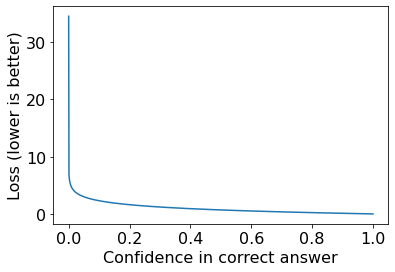

In [8]:
grid = np.linspace(0, 1, 1000)
plt.plot(
    grid,
    [log_loss(y_true=np.array([1]), y_pred=np.array([g]), labels=(0, 1)) for g in grid],
)
plt.xlabel("Confidence in correct answer")
plt.ylabel("Loss (lower is better)");

- Your loss goes to 0 as you approach 100% confidence in the correct answer.
- Your loss goes to infinity as you approach 100% confidence in the incorrect answer.
- (Optional) See also the very related [How to assign partial credit on an exam of true-false questions?](https://terrytao.wordpress.com/2016/06/01/how-to-assign-partial-credit-on-an-exam-of-true-false-questions/)

The real `LogisticRegression` is averaging this score over all training examples.


Some nice examples: 

- [Scott Alexander](https://slatestarcodex.com/2019/01/22/2018-predictions-calibration-results/)
  - Look at how the plot starts at 50%. That is because being 40% confident of "X" is the same as being 60% confident of "not X".
- [Good Judgment Project](https://www.gjopen.com/)





## Activity 2: Credence (time permitting)

- Take a few minutes and assign credences or values to the claims below, in the [Google doc](https://docs.google.com/document/d/1k0D_DLDcbPLKwAClSr6J_0t32SSUySPSjV4F0tytZ6c/edit?usp=sharing).  Afterwards, we'll discuss.
- **Do not search the answers; the point of the exercise is to evaluate how good we are at guessing.** 
- Try not to be influenced by other peoples' answers! Better to pick your answers before going to the Google Doc.

1. I am __ % sure that the world's longest river is between 6000km and 8000km. 
2. I am __ % sure that there is 4 to 8 liters of blood in an average adult human body. 
3. I am 99% sure that the world's tallest tree taller than __ m.
4. I am 90% sure that the world's tallest tree taller than __ m.
5. I am 50% sure that the world's tallest tree taller than __ m.

> NOTE: 100% means you are completely sure the statement is true, 0% means you are completely sure the statement is false.

<br><br>

## Visualizing your results

- Very powerful but at the same time can be misleading if not done properly. 

Pre-viewing review from [Calling BS visualization videos](https://www.youtube.com/watch?v=T-5aLbNeGo0&list=PLPnZfvKID1Sje5jWxt-4CSZD7bUI4gSPS&index=30&t=0s):

- Dataviz in the popular media.
  - e.g. [modern NYT](https://youtu.be/T-5aLbNeGo0?t=367)
- Misleading axes.
  - e.g. [vaccines](https://youtu.be/9pNWVMxaFuM?t=299)
- Manipulating bin sizes.
  - e.g. [tax dollars](https://youtu.be/zAg1wsYfwsM?t=196)
- Dataviz ducks.
  - e.g. [drinking water](https://youtu.be/rmii1hfP6d4?t=169)
  - "look how clever we are about design" -> making it about me instead of about you (see last class)
- Glass slippers.
  - e.g. [internet marketing tree](https://youtu.be/59teS0SUHtI?t=285)
- The principle of proportional ink.
  - e.g. [most read books](https://youtu.be/oNhusd3xFC4?t=147)

- [Demo of cleaning up a plot](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [Principle of proportional ink](https://serialmentor.com/dataviz/proportional-ink.html) from a viz textbook.

### Dataset

We'll be using [Kaggle House Prices dataset](https://www.kaggle.com/c/home-data-for-ml-course/), which we used in lecture 10. As usual, to run this notebook you'll need to download the data. For this dataset, train and test have already been separated. We'll be working with the train portion. 

In [9]:
df = pd.read_csv("data/housing-kaggle/train.csv")
train_df, test_df = train_test_split(df, test_size=0.10, random_state=123)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
302,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000
767,768,50,RL,75.0,12508,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,1300,7,2008,WD,Normal,160000
429,430,20,RL,130.0,11457,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,175000
1139,1140,30,RL,98.0,8731,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,144000
558,559,60,RL,57.0,21872,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,175000


In [10]:
train_df.shape

(1314, 81)

### Let's separate `X` and `y`

In [11]:
X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]

### Feature types 

- We have mixed feature types and a bunch of missing values. 
- Now, let's identify feature types and transformations. 

In [12]:
drop_features = ["Id"]
numeric_features = [
    "BedroomAbvGr",
    "KitchenAbvGr",
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "YrSold",
]

In [13]:
ordinal_features_reg = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
]
ordering = [
    "Po",
    "Fa",
    "TA",
    "Gd",
    "Ex",
]  # if N/A it will just impute something, per below
ordering_ordinal_reg = [ordering] * len(ordinal_features_reg)
ordering_ordinal_reg

[['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
 ['Po', 'Fa', 'TA', 'Gd', 'Ex']]

In [14]:
ordinal_features_oth = [
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Functional",
    "Fence",
]
ordering_ordinal_oth = [
    ["NA", "No", "Mn", "Av", "Gd"],
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"],
]

The remaining features are categorical features.

In [15]:
categorical_features = list(
    set(X_train.columns)
    - set(numeric_features)
    - set(ordinal_features_reg)
    - set(ordinal_features_oth)
    - set(drop_features)
)
categorical_features

['Street',
 'LandContour',
 'RoofMatl',
 'LotShape',
 'MasVnrType',
 'GarageFinish',
 'Electrical',
 'Neighborhood',
 'CentralAir',
 'PavedDrive',
 'Heating',
 'Foundation',
 'Condition2',
 'MSSubClass',
 'SaleCondition',
 'BldgType',
 'LotConfig',
 'Condition1',
 'Alley',
 'Exterior2nd',
 'SaleType',
 'RoofStyle',
 'MoSold',
 'Utilities',
 'GarageType',
 'MSZoning',
 'Exterior1st',
 'HouseStyle',
 'LandSlope',
 'MiscFeature']

### Applying feature transformations

- Since we have mixed feature types, let's use `ColumnTransformer` to apply different transformations on different features types.  

In [16]:
from sklearn.compose import ColumnTransformer, make_column_transformer

numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
ordinal_transformer_reg = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_reg),
)

ordinal_transformer_oth = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_oth),
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

preprocessor = make_column_transformer(
    ("drop", drop_features),
    (numeric_transformer, numeric_features),
    (ordinal_transformer_reg, ordinal_features_reg),
    (ordinal_transformer_oth, ordinal_features_oth),
    (categorical_transformer, categorical_features),
)

### Examining the preprocessed data

In [17]:
preprocessor.fit(X_train)
# Calling fit to examine all the transformers.

ColumnTransformer(transformers=[('drop', 'drop', ['Id']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['BedroomAbvGr', 'KitchenAbvGr', 'LotFrontage',
                                  'LotArea', 'OverallQual', 'OverallCond',
                                  'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '...
                                 ['Street', 'LandContour', 'RoofMatl',
                                  'LotShape', 'MasVnrType', 'GarageFinish',
                                  'Electrical', 'Neighborhood', 'CentralAir',
                 

In [29]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-4"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
)
new_columns = (
    numeric_features + ordinal_features_reg + ordinal_features_oth + ohe_columns
)

In [19]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,BedroomAbvGr,KitchenAbvGr,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,HouseStyle_SFoyer,HouseStyle_SLvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing
302,0.154795,-0.222647,2.312501,0.381428,0.663680,-0.512408,0.993969,0.840492,0.269972,-0.961498,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
767,1.372763,-0.222647,0.260890,0.248457,-0.054669,1.285467,-1.026793,0.016525,-0.573129,0.476092,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
429,0.154795,-0.222647,2.885044,0.131607,-0.054669,-0.512408,0.563314,0.161931,-0.573129,1.227559,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1139,0.154795,-0.222647,1.358264,-0.171468,-0.773017,-0.512408,-1.689338,-1.679877,-0.573129,0.443419,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
558,0.154795,-0.222647,-0.597924,1.289541,0.663680,-0.512408,0.828332,0.598149,-0.573129,0.354114,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
X_test_enc = pd.DataFrame(
    preprocessor.transform(X_test), index=X_test.index, columns=new_columns
)
X_test_enc.head()

,BedroomAbvGr,KitchenAbvGr,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,HouseStyle_SFoyer,HouseStyle_SLvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing
147,0.154795,-0.222647,-0.025381,-0.085415,0.663680,-0.512408,0.993969,0.792023,0.438592,-0.961498,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
676,1.372763,4.348569,-0.454788,-0.074853,-1.491366,-3.209221,-2.351883,-1.679877,-0.573129,-0.961498,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1304,0.154795,-0.222647,-1.790721,-0.768279,0.663680,-0.512408,1.093350,0.937429,0.084490,-0.961498,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1372,0.154795,-0.222647,0.260890,-0.058176,0.663680,0.386530,0.894587,0.646617,-0.573129,1.162214,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1427,0.154795,-0.222647,-0.454788,0.073016,-0.773017,0.386530,-0.861157,-1.679877,-0.573129,0.301838,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
X_train.shape, X_test.shape

((1314, 80), (146, 80))

### Training random forests and gradient boosted trees

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

Let's compare sklearn's `GradientBoostingRegressor` to `RandomForestRegressor` for different values of `n_estimators`.

In [23]:
n_estimators_values = [3, 10, 30, 100, 300]

In [24]:
score_rf_train = list()
score_rf_test = list()
score_gb_train = list()
score_gb_test = list()

for n_estimators in n_estimators_values:
    print(n_estimators)
    rf = TransformedTargetRegressor(
        RandomForestRegressor(n_estimators=n_estimators, random_state=123),
        func=np.log1p,
        inverse_func=np.expm1,
    )
    rf.fit(X_train_enc, y_train)
    score_rf_train.append(rf.score(X_train_enc, y_train))
    score_rf_test.append(rf.score(X_test_enc, y_test))

    gb = TransformedTargetRegressor(
        GradientBoostingRegressor(n_estimators=n_estimators, random_state=123),
        func=np.log1p,
        inverse_func=np.expm1,
    )
    gb.fit(X_train_enc, y_train)
    score_gb_train.append(gb.score(X_train_enc, y_train))
    score_gb_test.append(gb.score(X_test_enc, y_test))

3
10
30
100
300


Here is a low-quality plot that is confusing and perhaps downright misleading:

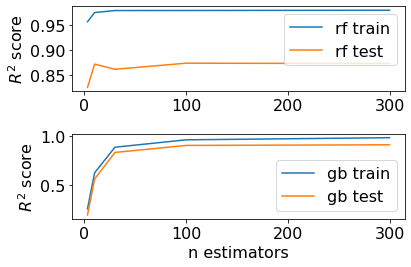

In [25]:
plt.subplot(2, 1, 1)
plt.plot(n_estimators_values, score_rf_train, label="rf train")
plt.plot(n_estimators_values, score_rf_test, label="rf test")
plt.ylabel("$R^2$ score")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(n_estimators_values, score_gb_train, label="gb train")
plt.plot(n_estimators_values, score_gb_test, label="gb test")
plt.xlabel("n estimators")
plt.ylabel("$R^2$ score")
plt.legend()
plt.tight_layout();

Let's create some visualizations. 

- Create a visualization that makes RF look better than GB.
- Create a visualization that makes GB look better than RF.
- Create a visualization that makes RF and GB look equally good.

You can create your own misleading example and copy or screenshot it and paste it into the [Google Doc](https://docs.google.com/document/d/1y4YMSAWQGRFFn8ig0pAs5TJR5h2jKnvtY97HN-rEkyE/edit#).

Here are some misleading plots. 

### RF better than GB

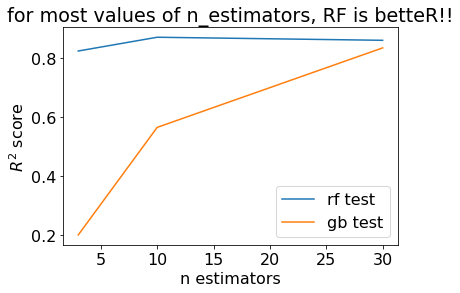

In [26]:
nmax = 3

# plt.plot(n_estimators_values[:nmax], score_rf_train[:nmax], label="rf train")
plt.plot(n_estimators_values[:nmax], score_rf_test[:nmax], label="rf test")
# plt.plot(n_estimators_values[:nmax], score_gb_train[:nmax], label="gb train")
plt.plot(n_estimators_values[:nmax], score_gb_test[:nmax], label="gb test")
plt.xlabel("n estimators")
plt.ylabel("$R^2$ score")
plt.legend()
plt.title("for most values of n_estimators, RF is betteR!!");

### GB better than RF

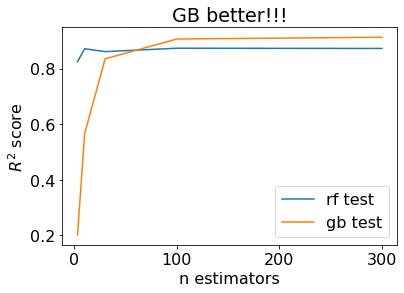

In [27]:
# plt.plot(n_estimators_values, score_rf_train, label="rf train")
plt.plot(n_estimators_values, score_rf_test, label="rf test")
# plt.ylabel("$R^2$ score");
# plt.legend();
# plt.subplot(2,1,2)
# plt.plot(n_estimators_values, score_gb_train, label="gb train")
plt.plot(n_estimators_values, score_gb_test, label="gb test")
plt.xlabel("n estimators")
plt.ylabel("$R^2$ score")
plt.legend()
plt.title("GB better!!!");

### Equally good

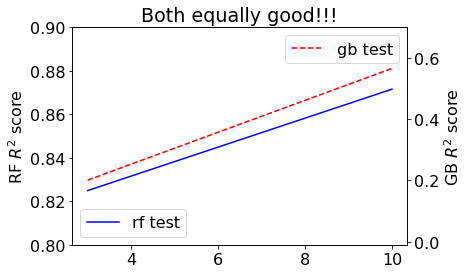

In [28]:
nmax = 2

# plt.plot(n_estimators_values, score_rf_train, label="rf train")
plt.plot(n_estimators_values[:nmax], score_rf_test[:nmax], "b", label="rf test")
plt.ylabel("RF $R^2$ score")
plt.legend(loc="lower left")
plt.ylim((0.8, 0.9))
plt.twinx()
# plt.plot(n_estimators_values, score_gb_train, label="gb train")
plt.plot(n_estimators_values[:nmax], score_gb_test[:nmax], "--r", label="gb test")
plt.xlabel("n estimators")
plt.ylabel("GB $R^2$ score")
plt.legend()
plt.ylim((-0.01, 0.70))
plt.title("Both equally good!!!");

**Be critical of your visualizations and try to make them as honest as possible.**

<br><br>

## What did we learn today?

### Principles of effective communication
  - Concepts then labels, not the other way around.
  - Bottom-up explanations.
  - New ideas in small chunks.
  - Reuse your running examples.
  - Approaches from all angles.  
  - When experimenting, show the results asap.
  - **It's not about you.**

- Decision variables, objectives, and context.
- How does ML fit in?
- Expressing your confidence about the results
- Misleading visualizations.  